In [218]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, SGD, Adam

In [219]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [220]:
import numpy as np  
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img  
from keras.models import Sequential  
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt  
import matplotlib.image as mpimg
%matplotlib inline
import math  
import cv2  
import datetime

In [221]:
import pydot
import graphviz
import visualkeras
from collections import defaultdict
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 12)

In [222]:
import keras
from keras import models
from keras import layers

In [223]:
pip show tensorboard

Name: tensorboard
Version: 2.8.0
Summary: TensorBoard lets you watch Tensors Flow
Home-page: https://github.com/tensorflow/tensorboard
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\jalal\anaconda3\lib\site-packages
Requires: absl-py, google-auth, google-auth-oauthlib, grpcio, markdown, numpy, protobuf, requests, setuptools, tensorboard-data-server, tensorboard-plugin-wit, werkzeug, wheel
Required-by: tensorflow
Note: you may need to restart the kernel to use updated packages.


In [38]:
#!pip install keras-tuner

In [39]:
from keras_tuner import RandomSearch
import keras_tuner as kt

In [40]:
#pip install tensorboard

In [41]:
train_data_dir = 'train_binary/'
validation_data_dir = 'val_binary/'

In [42]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,  
        target_size=(15,1486), 
        batch_size=512,
        shuffle=True,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir, 
        target_size=(15,1486), 
        batch_size=512,
        shuffle=True,
        class_mode='binary')

Found 22935 images belonging to 2 classes.
Found 4935 images belonging to 2 classes.


In [43]:
def build_model(hp):
    
    
    hp_active = hp.Choice('activation_function', values = ['relu', 'tanh', 'LeakyReLU'])
    model = models.Sequential([

    layers.Conv2D(
    filters=hp.Int('conv_1_filter', min_value=16, max_value=128, step=16),
    kernel_size=hp.Choice('conv_1_kernel', values = [3, 4, 5]),padding='same',
    activation= hp_active,
    input_shape=(15, 1486, 3)),   
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(name = 'BatchN1', momentum=0.9),
        
        
    layers.Conv2D(
    filters=hp.Int('conv_2_filter', min_value=32, max_value=256, step=32),
    kernel_size=hp.Choice('conv_2_kernel', values = [3, 4, 5]),padding='same',
    activation=hp_active), 
    layers.MaxPooling2D((2, 2), padding='same'),
    

    layers.Conv2D(
    filters=hp.Int('conv_3_filter', min_value=32, max_value=512, step=32),
    kernel_size=hp.Choice('conv_3_kernel', values = [3, 4, 5]),padding='same',
    activation=hp_active),
    layers.MaxPooling2D((2, 2), padding='same'),
        

        
    layers.Conv2D(
    filters=hp.Int('conv_4_filter', min_value=32, max_value=512, step=32),
    kernel_size=hp.Choice('conv_4_kernel', values = [3, 4, 5]),padding='same',
    activation=hp_active),
    layers.MaxPooling2D((2, 2), padding='same'),
      
        
    layers.Flatten(),
        
    layers.Dropout(0.1),
        
    layers.Dense(units=hp.Int('dense_1_units', min_value=16, max_value=128, step=16),
    activation= hp_active),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
    ])    
    
    
    
    
    
    
    hp_lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_optimizer = hp.Choice('optimizer', values=['sgd', 'rmsprop', 'adam'])
    
    if hp_optimizer == 'sgd':
        optimizer = SGD(learning_rate=hp_lr)
    elif hp_optimizer == 'rmsprop':
        optimizer = RMSprop(learning_rate=hp_lr)
    else:
        optimizer = Adam(learning_rate=hp_lr)

    
    model.compile(optimizer = optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy'])
    
    
    return model

In [44]:
tuner_search=RandomSearch(build_model, objective='val_accuracy', max_trials=60,directory='hyper_results/',project_name="EVC2")

tuner_search.search(train_generator, epochs=100, verbose=1, validation_data= validation_generator, callbacks=[keras.callbacks.TensorBoard(log_dir = "hyper_results/logs2")])

Trial 22 Complete [00h 25m 34s]
val_accuracy: 0.9621074199676514

Best val_accuracy So Far: 0.9657548069953918
Total elapsed time: 11h 17m 55s

Search: Running Trial #23

Value             |Best Value So Far |Hyperparameter
relu              |relu              |activation_function
32                |96                |conv_1_filter
3                 |5                 |conv_1_kernel
224               |64                |conv_2_filter
4                 |5                 |conv_2_kernel
416               |192               |conv_3_filter
3                 |3                 |conv_3_kernel
480               |384               |conv_4_filter
3                 |4                 |conv_4_kernel
80                |64                |dense_1_units
0.01              |0.0001            |learning_rate
rmsprop           |rmsprop           |optimizer

Epoch 1/100
45/45 [==============================] - 65s 1s/step - loss: 27687.2148 - accuracy: 0.5599 - val_loss: 0.6042 - val_accuracy: 0.6732
Epoc

Epoch 50/100
45/45 [==============================] - 42s 935ms/step - loss: 0.6932 - accuracy: 0.5011 - val_loss: 0.6932 - val_accuracy: 0.5015
Epoch 51/100
45/45 [==============================] - 42s 938ms/step - loss: 0.6932 - accuracy: 0.5017 - val_loss: 0.6932 - val_accuracy: 0.5015
Epoch 52/100
45/45 [==============================] - 42s 938ms/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6932 - val_accuracy: 0.5015
Epoch 53/100
45/45 [==============================] - 42s 939ms/step - loss: 0.6932 - accuracy: 0.4995 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 54/100
45/45 [==============================] - 42s 939ms/step - loss: 0.6932 - accuracy: 0.4971 - val_loss: 0.6932 - val_accuracy: 0.5015
Epoch 55/100
45/45 [==============================] - 42s 937ms/step - loss: 0.6932 - accuracy: 0.5037 - val_loss: 0.6932 - val_accuracy: 0.5015
Epoch 56/100
45/45 [==============================] - 43s 942ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6932 - val_ac

KeyboardInterrupt: 

In [224]:
%reload_ext tensorboard
#%tensorboard --logdir hyper_results/logs

In [225]:
%tensorboard --logdir hyper_results/logs2  --host localhost --port 22100

Reusing TensorBoard on port 22100 (pid 3864), started 4:30:53 ago. (Use '!kill 3864' to kill it.)

In [217]:
tuner_search.results_summary(15)

Results summary
Results in hyper_results/EVC2
Showing 15 best trials
Trial summary
Hyperparameters:
activation_function: relu
conv_1_filter: 96
conv_1_kernel: 5
conv_2_filter: 64
conv_2_kernel: 5
conv_3_filter: 192
conv_3_kernel: 3
conv_4_filter: 384
conv_4_kernel: 4
dense_1_units: 64
learning_rate: 0.0001
optimizer: rmsprop
Score: 0.9657548069953918
Trial summary
Hyperparameters:
activation_function: relu
conv_1_filter: 80
conv_1_kernel: 3
conv_2_filter: 160
conv_2_kernel: 4
conv_3_filter: 320
conv_3_kernel: 4
conv_4_filter: 96
conv_4_kernel: 4
dense_1_units: 16
learning_rate: 0.0001
optimizer: adam
Score: 0.9637284874916077
Trial summary
Hyperparameters:
activation_function: LeakyReLU
conv_1_filter: 32
conv_1_kernel: 5
conv_2_filter: 32
conv_2_kernel: 5
conv_3_filter: 256
conv_3_kernel: 5
conv_4_filter: 128
conv_4_kernel: 3
dense_1_units: 112
learning_rate: 0.001
optimizer: adam
Score: 0.963323175907135
Trial summary
Hyperparameters:
activation_function: relu
conv_1_filter: 64
conv_1

In [196]:
model_lst=tuner_search.get_best_models(num_models=15)

In [197]:
model_lst

In [212]:
model = model_lst[9]

IndexError: list index out of range

In [211]:
model.save('cnn_trail_20_best_10.h5')

In [185]:
# from keras.utils.vis_utils import plot_model
# plot_model(model, to_file='model_plot.jpg', show_shapes=True, show_layer_names=False, dpi =300)

In [186]:
# color_map = defaultdict(dict)
# color_map[layers.Conv2D]['fill'] = 'orange'
# color_map[layers.ZeroPadding2D]['fill'] = 'gray'
# color_map[layers.Dropout]['fill'] = 'pink'
# color_map[layers.MaxPooling2D]['fill'] = 'red'
# color_map[layers.Dense]['fill'] = 'green'
# color_map[layers.Flatten]['fill'] = 'teal'
# visualkeras.layered_view(model, legend=True,color_map=color_map, font=font, spacing=100, scale_xy=0.5, scale_z=0.1, max_z=40)

In [53]:
from keras.callbacks import ModelCheckpoint

In [54]:
import numpy
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import time

In [55]:
#plt.style.use('seaborn')

In [167]:
test_data_dir = 'test_binary2/'

In [168]:
#model = tf.keras.models.load_model('CNN_1024_23.h5')

In [169]:
test_generator = ImageDataGenerator()

In [170]:
test_data_gen = test_generator.flow_from_directory(test_data_dir,
        target_size=(15, 1486),
        batch_size= 64 ,shuffle=False,
        class_mode= 'binary',classes=['0', '1'])

Found 328 images belonging to 2 classes.


In [171]:
test_steps_per_epoch = numpy.math.ceil(test_data_gen.samples / test_data_gen.batch_size)

In [172]:
model.evaluate(test_data_gen, steps=test_steps_per_epoch)

6/6 [==============================] - 1s 30ms/step - loss: 57.4017 - accuracy: 0.8689


[57.401676177978516, 0.8689024448394775]

In [173]:
start = time.time()
predictions = model.predict(test_data_gen, steps=test_steps_per_epoch)
end = time.time()
(end-start)/328

0.0007853377156141327

In [174]:
predictions.sum()

149.99438

In [175]:
labels = (predictions > 0.5).astype(int)

In [176]:
true_classes = test_data_gen.classes
class_labels = list(test_data_gen.class_indices.keys())  

In [177]:
report = metrics.classification_report(true_classes, labels, target_names=class_labels, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.8427    0.9091    0.8746       165
           1     0.9000    0.8282    0.8626       163

    accuracy                         0.8689       328
   macro avg     0.8713    0.8687    0.8686       328
weighted avg     0.8712    0.8689    0.8687       328



In [178]:
print(confusion_matrix(true_classes, labels))

[[150  15]
 [ 28 135]]


In [179]:
fpr, tpr, thresh = roc_curve(true_classes, labels, pos_label=1)

In [180]:
tpr

array([0.        , 0.82822086, 1.        ])

In [181]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(328)]
p_fpr, p_tpr, _ = roc_curve(true_classes, random_probs, pos_label=1)

In [182]:
auc_score = roc_auc_score(true_classes, labels)

In [183]:
auc_score

0.8686558839933073

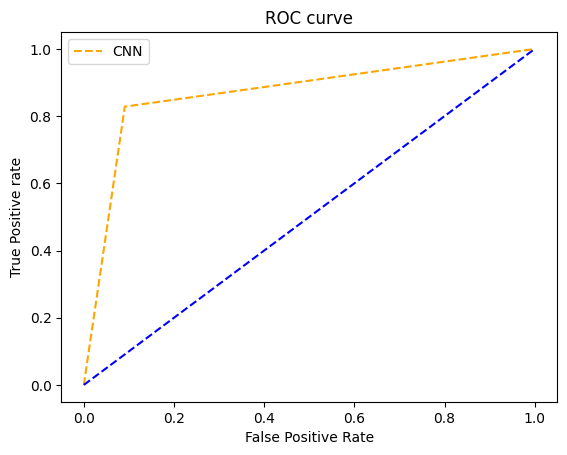

In [184]:
plt.plot(fpr, tpr, linestyle='--',color='orange', label='CNN')
#plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();